# Deep Learning in Medical AI 2018/2019 using PyTorch & Google Collab.

<img src="https://github.com/deeponcology/PyTorchMedicalAI/raw/master/assets/tumor_visdom.jpg" align="center" width=30%>

### Authors: 
***Shlomo Kashani***, Head of AI at www.DeepOncology.AI, shlomo@deeponcology.ai 

<img src="https://github.com/deeponcology/PyTorchMedicalAI/raw/master/assets/line-up-small.png" align="center" width=30%>


### Synopsys:
This is the hands-on deep learning tutorial series for the 2018/2019 Medical AI course. The series will guide you through the most basic building blocks such as installing CUDA to training advanced CNN's such as SeNet. 

### DataSets:
We foster the use of Medical Data Sets (https://grand-challenge.org/All_Challenges/) and predominantly those available (but not only) via Kaggle.

### About PyTorch:

PyTorch is an open source library for numerical computation using  computation graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. 


Similar to python programming, we can add and execute a node to the computation graph immediately. This property makes it easy to debug the code and inspect the values in the network.

### The other Notebooks in this series: 
If you are familiar with these topics, feel free to jump to other modules.


1.   List item
2.   List item




# Collab notebook: 001 using C CUDA  code from Python

In [0]:
%reset -f

In [0]:
# Do we have cuda?!
!which nvcc
!nvcc --version

/usr/local/cuda/bin/nvcc
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Tue_Jun_12_23:07:04_CDT_2018
Cuda compilation tools, release 9.2, V9.2.148


In [0]:
# Let's check if a GPU accelerator card is attached in our machine:
!ls -l /dev/nv*

crw-rw-rw- 1 root root 195,   0 Nov 30 17:52 /dev/nvidia0
crw-rw-rw- 1 root root 195, 255 Nov 30 17:52 /dev/nvidiactl
crw-rw-rw- 1 root root 248,   0 Nov 30 17:52 /dev/nvidia-uvm
crw-rw-rw- 1 root root 248,   1 Nov 30 17:52 /dev/nvidia-uvm-tools


In [0]:
# This works too, GPU count and name
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-128dbb25-be82-dd2f-4533-82912d85f831)


### Use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'

In [0]:
!nvidia-smi

Tue Nov 27 15:02:06 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz


In [0]:
#no.of threads each core is having
!lscpu | grep 'Thread(s) per core'

Thread(s) per core:  2


In [0]:
#memory that we can use
!cat /proc/meminfo | grep 'MemAvailable'

MemAvailable:   12654056 kB


In [0]:
#hard disk that we can use
!df -h / | awk '{print $4}'

Avail
333G


In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [0]:
# This magic will create a new CU file
# To write a CUDA C program, we need to:

#Create a source code fi le with the special fi le name extension of .cu.
#Compile the program using the CUDA nvcc compiler.
#Run the executable file from the command line, which contains the kernel code executable on the GPU.

%%file version.cu
#include <thrust/version.h>
#include <iostream>

int main(void)
{
  int major = THRUST_MAJOR_VERSION;
  int minor = THRUST_MINOR_VERSION;

  std::cout << "Thrust v" << major << "." << minor << std::endl;

  return 0;
}

Writing version.cu


In [0]:
# nvcc is the CUDA compiler 
!nvcc version.cu -o version
!./version

Thrust v1.9


###  Memory footprint support libraries/code

In [23]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()


  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /root/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /root/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 11.6 GB  I Proc size: 1.9 GB
GPU RAM Free: 11125MB | Used: 316MB | Util   3% | Total 11441MB


# Collab notebook: 002 PyTorch DataLoaders

In [24]:
import sys
sys.version


'3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'

In [0]:
import torch

## Great, so we need to install PyTorch ... 

In [1]:
!pip3 install torch==0.4
!pip3 install torchvision

    100% |████████████████████████████████| 484.0MB 32kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5b224000 @  0x7fb484cd32a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 4.9MB/s 
    100% |████████████████████████████████| 2.0MB 14.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


## Import PyTorch once again

In [0]:
import matplotlib.pyplot as plt
import time
from shutil import copyfile
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import numpy as np
import torch
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as func
import torchvision
from torchvision import transforms, datasets, models
import random 


## Let's print the versions

In [27]:
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
# call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

use_cuda = torch.cuda.is_available()
# use_cuda = False

print("USE CUDA=" + str (use_cuda))
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
Tensor = FloatTensor

__Python VERSION: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
__pyTorch VERSION: 0.4.0
__CUDA VERSION
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Tue_Jun_12_23:07:04_CDT_2018
Cuda compilation tools, release 9.2, V9.2.148
__CUDNN VERSION: 7102
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0
USE CUDA=True


## Fixing the Random Seed

In [0]:
manualSeed = 2222
def fixSeed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if use_cuda:
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)


if manualSeed is None:
        manualSeed = 999
fixSeed(manualSeed)

## The DataSet class ... PyTorch Datasets

To create a dataset, we subclass Dataset and define a constructor, a __len__ method, and a __getitem__ method. Here is full example:

In [0]:
import os, sys, pdb, shutil, time, random
import argparse
import torch
import torch.backends.cudnn as cudnn
import torchvision.datasets as dset
import torchvision.transforms as transforms
# from utils import AverageMeter, RecorderMeter, time_string, convert_secs2time
# from tensorboard_logger import configure, log_value
from tqdm import tqdm
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as func
import torchvision
from torchvision import transforms, datasets, models
import random
from shutil import copyfile
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import time
from shutil import copyfile
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import numpy as np
import torch
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as func
import torchvision
from torchvision import transforms, datasets, models
import random
import sys
from glob import glob
import fnmatch

class GenericDataset(Dataset):
  def __init__(self, labels, root_dir, subset=False, transform=None):
    self.labels = labels
    self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    img_name = self.labels.iloc[idx, 0]  # file name
    fullname = join(self.root_dir, img_name)
    image = Image.open(fullname).convert('RGB')
    labels = self.labels.iloc[idx, 2]  # category_id
    #         print (labels)
    if self.transform:
      image = self.transform(image)
    return image, labels

  @staticmethod
  def find_classes(fullDir):
    classes = [d for d in os.listdir(fullDir) if os.path.isdir(os.path.join(fullDir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    num_to_class = dict(zip(range(len(classes)), classes))

    train = []
    for index, label in enumerate(classes):
      path = fullDir + label + '/'
      for file in listdir(path):
        train.append(['{}/{}'.format(label, file), label, index])

    df = pd.DataFrame(train, columns=['file', 'category', 'category_id', ])

    return classes, class_to_idx, num_to_class, df

#   @staticmethod
#   def find_classes_melanoma(fullDir):

#     df_labels = pd.read_csv("melanoma_labels.csv", sep=',')
#     class_to_idx= {'benign': 0, 'malignant': 1}
#     num_to_class= {0: 'benign', 1: 'malignant'}
#     #
#     classes = [d for d in os.listdir(fullDir) if os.path.isdir(os.path.join(fullDir, d))]
#     print('Classes: {}'.format(classes))
#     print('class_to_idx: {}'.format(class_to_idx))
#     print('num_to_class: {}'.format(num_to_class))

#     train = []
#     for index, row in (df_labels.iterrows()):
#       id = (row['image_id'])
#       # currImage = os.path.join(fullDir, num_to_class[(int(row['melanoma']))] + '/' + id + '.jpg')
#       currImage_on_disk = os.path.join(fullDir, id + '.jpg')
#       if os.path.isfile(currImage_on_disk):
#         if (int(row['seborrheic_keratosis']))==1 or (int(row['melanoma']))==1:
#           trait='malignant'
#         else:
#           trait = 'benign'

#         train.append(['{}'.format(currImage_on_disk), trait, class_to_idx[trait]])

#     # train.append(['{}'.format(currImage_on_disk), num_to_class[(int(row['seborrheic_keratosis']))],
#     #               class_to_idx[num_to_class[(int(row['seborrheic_keratosis']))]]])
#     #
#     df = pd.DataFrame(train, columns=['file', 'category', 'category_id', ])
#     df.to_csv('full_melanoma_labels.csv', index=None)
#     return classes, class_to_idx, num_to_class, df


#   @staticmethod
#   def find_classes_breast(fullDir):
#     imageList = glob(fullDir + '/**/*.png', recursive=True)

#     benign = '*class0.png'
#     malignant = '*class1.png'
#     classZero = fnmatch.filter(imageList, benign)
#     classOne = fnmatch.filter(imageList, malignant)
#     #         print("benign:",classZero[0:5],'\n')
#     #         print("malignant:",classOne[0:5])

#     class_to_idx = {'benign': 0, 'malignant': 1}
#     num_to_class = {0: 'benign', 1: 'malignant'}
#     classes = ['benign', 'malignant']

#     print('Classes: {}'.format(classes))
#     print('class_to_idx: {}'.format(class_to_idx))
#     print('num_to_class: {}'.format(num_to_class))

#     train = []
#     for currImage_on_disk in classZero:
#       if os.path.isfile(currImage_on_disk):
#         train.append(['{}'.format(currImage_on_disk), 'benign', class_to_idx['benign']])

#     for currImage_on_disk in classOne:
#       if os.path.isfile(currImage_on_disk):
#         train.append(['{}'.format(currImage_on_disk), 'malignant', class_to_idx['malignant']])

#     df = pd.DataFrame(train, columns=['file', 'category', 'category_id', ])
#     df.to_csv('full_labels_breast.csv', index=None)
#     return classes, class_to_idx, num_to_class, df

## Download the data

### Kaggle 162 H&E
This dataset consists of 5547 breast histology images of size 50 x 50 x 3, curated from Andrew Janowczyk website and used for a data science tutorial at Epidemium. The goal is to classify cancerous images (IDC : invasive ductal carcinoma) vs non-IDC images.

### Download: 
https://www.kaggle.com/simjeg/lymphoma-subtype-classification-fl-vs-cll or http://andrewjanowczyk.com/wp-static/IDC_regular_ps50_idx5.zip



### Download:
https://www.kaggle.com/c/plant-seedlings-classification
kaggle competitions download -c plant-seedlings-classification


data_dir= '/home/data/bone/train/'
    data_dir= '/home/data/bone/train/

    ├── valid
    │   └── Type_1
        ├── Type_2
        └── Type_3
    └── train
        ├── Type_1
        ├── Type_2
        └── Type_3

In [0]:
# kaggle competitions download -c plant-seedlings-classification
!wget http://andrewjanowczyk.com/wp-static/IDC_regular_ps50_idx5.zip


--2018-11-30 17:57:33--  http://andrewjanowczyk.com/wp-static/IDC_regular_ps50_idx5.zip
Resolving andrewjanowczyk.com (andrewjanowczyk.com)... 129.22.136.73
Connecting to andrewjanowczyk.com (andrewjanowczyk.com)|129.22.136.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1644892042 (1.5G) [application/zip]
Saving to: ‘IDC_regular_ps50_idx5.zip’

IDC_regular_ps50_id 100%[===================>]   1.53G  3.13MB/s    in 7m 19s  

2018-11-30 18:04:53 (3.57 MB/s) - ‘IDC_regular_ps50_idx5.zip’ saved [1644892042/1644892042]



## Export your Kaggle API Key

In [0]:
!mkdir -p ~/.kaggle
# ~/.kaggle/kaggle.json
  # {"username":"solomonk","key":"af21d853c5e242e7d4c3e0e6a588309b"}
  # kaggle competitions download -c plant-seedlings-classification

In [7]:
%%file ~/.kaggle/kaggle.json
  
{"username":"hyperion20","key":"8d5f88c0c26421603731399f14e0bada"}

Writing /root/.kaggle/kaggle.json


In [8]:
# from google.colab import drive
# drive.mount('/content/gdrive')
!pip install kaggle --upgrade
!kaggle competitions download -c plant-seedlings-classification

    100% |████████████████████████████████| 61kB 5.7MB/s 
    100% |████████████████████████████████| 245kB 15.7MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify
  0% 0.00/5.13k [00:00<?, ?B/s]
100% 5.13k/5.13k [00:00<00:00, 2.74MB/s]
 94% 81.0M/86.0M [00:01<00:00, 34.6MB/s]
100% 86.0M/86.0M [00:01<00:00, 48.4MB/s]
 99% 1.59G/1.60G [00:36<00:00, 76.8MB/s]
100% 1.60G/1.60G [00:36<00:00, 46.8MB/s]


In [30]:
! ls -la

total 88064
drwxr-xr-x  1 root root     4096 Dec  2 18:32 .
drwxr-xr-x  1 root root     4096 Dec  2 18:27 ..
drwxr-xr-x  1 root root     4096 Nov 29 18:21 .config
drwxr-xr-x  2 root root     4096 Nov 29 18:21 sample_data
-rw-r--r--  1 root root     5251 Dec  2 18:31 sample_submission.csv.zip
drwxr-xr-x  2 root root     4096 Dec  2 18:32 seeds
-rw-r--r--  1 root root 90141460 Dec  2 18:31 test.zip
drwxrwxr-x 14 root root     4096 Nov 21  2017 train


In [31]:
!mkdir seeds
!mv train.zip seeds/train.zip
!unzip seeds/train.zip 

mkdir: cannot create directory ‘seeds’: File exists
mv: cannot stat 'train.zip': No such file or directory
Archive:  seeds/train.zip
replace train/Fat Hen/5bdfa3a44.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
! ls seeds

train.zip


In [12]:
!ls train

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [0]:
import os
from glob import glob
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

dataset='train/' # 
data_dir= './' +  dataset

## Print single image

Number of images: 4750
./train/Common wheat/ca6c95ade.png
./train/Common wheat/9d99ab3f3.png
./train/Common wheat/6e083d6ff.png
./train/Common wheat/79f70b2d7.png
./train/Common wheat/3bb7f71ae.png


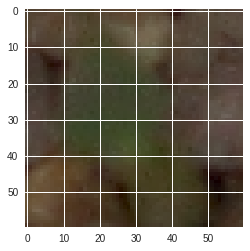

In [34]:
# !pip install --no-cache-dir -I pillow
# !pip install Pillow==4.0.0
# !pip install PIL
# !pip install image


imageList = glob(data_dir + '/**/*.png', recursive=True)
print ( "Number of images: {}". format (len (imageList)))
for img in imageList[0:5]:
    print(img)
    
%matplotlib inline
pil_im = Image.open(imageList[0], 'r')
imshow(np.asarray(pil_im))

In [15]:
!pip install --no-cache-dir -I pillow
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

    100% |████████████████████████████████| 2.0MB 60.3MB/s 
    100% |████████████████████████████████| 5.6MB 6.3MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
    100% |████████████████████████████████| 7.3MB 5.6MB/s 


## Print a grid of images

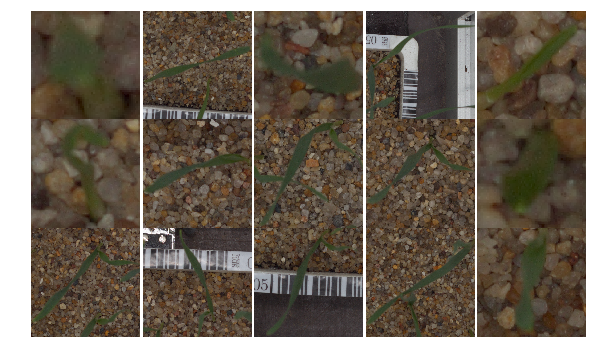

In [35]:
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in imageList[:15]:
    pil_im = Image.open(l, 'r')        
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(np.asarray(pil_im)); 
    plt.axis('off')
    i_ += 1

## Use the DataSet

In [36]:
classes, class_to_idx, num_to_class, df =GenericDataset.find_classes(data_dir )

print (classes)
print (class_to_idx)
print (num_to_class)
df.head(5)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
{0: 'Black-grass', 1: 'Charlock', 2: 'Cleavers', 3: 'Common Chickweed', 4: 'Common wheat', 5: 'Fat Hen', 6: 'Loose Silky-bent', 7: 'Maize', 8: 'Scentless Mayweed', 9: 'Shepherds Purse', 10: 'Small-flowered Cranesbill', 11: 'Sugar beet'}


,file,category,category_id
0,Black-grass/840a7ed59.png,Black-grass,0
1,Black-grass/3a8c485bc.png,Black-grass,0
2,Black-grass/1e49633e0.png,Black-grass,0
3,Black-grass/c66bab8b6.png,Black-grass,0
4,Black-grass/aa5bb06a1.png,Black-grass,0


In [37]:
data_dir

'./train/'

## Target distribution : Train set

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


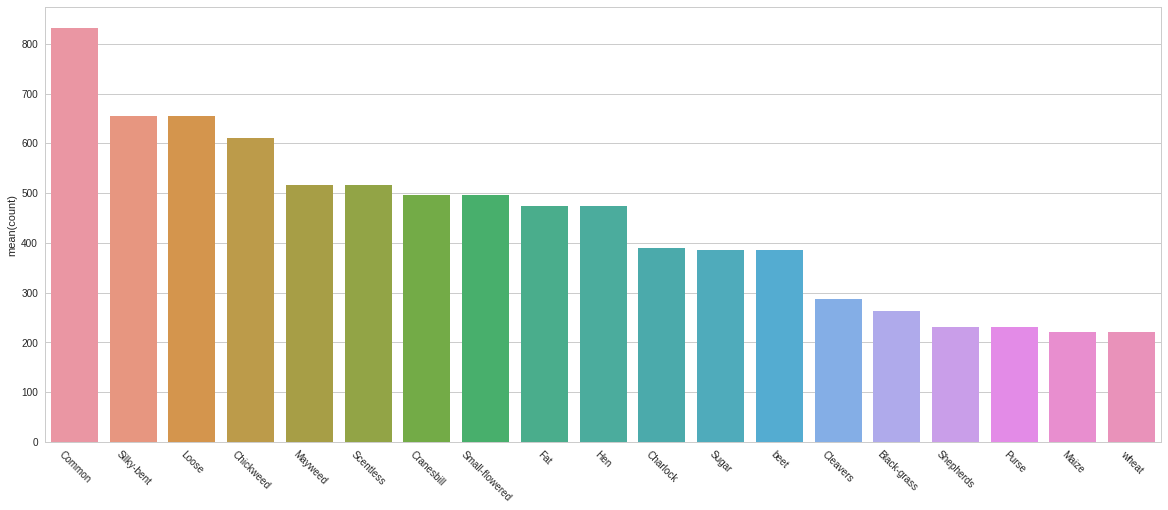

In [20]:
import seaborn as sns
sns.set(color_codes=True)
pal = sns.color_palette()
sns.set_style("whitegrid")

labels = df['category'].apply(lambda x: x.split(' '))
from collections import Counter, defaultdict
counts = defaultdict(int)
for l in labels:
    for l2 in l:
        counts[l2] += 1

counts_df = pd.DataFrame.from_dict(counts, orient='index')
counts_df.columns = ['count']
counts_df.sort_values('count', ascending=False, inplace=True)

fig, ax = plt.subplots()
ax = sns.barplot(x=counts_df.index, y=counts_df['count'], ax=ax)
fig.set_size_inches(20,8)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=-45);

## Augmentation / Transformations

In [0]:
from __future__ import absolute_import

from torchvision.transforms import *

from PIL import Image, ImageDraw
import numpy as np
import torch

import torchvision
import random
from PIL import Image, ImageOps
import numpy as np
import numbers
import math
import torch
import torch
import random
import PIL.ImageEnhance as ie
import PIL.Image as im

# adapted from https://github.com/kuangliu/pytorch-retinanet/blob/master/transform.py
# https://github.com/mratsim/Amazon-Forest-Computer-Vision/blob/master/src/p_data_augmentation.py

normalize_img = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])


{'train': 4038, 'valid': 712}
6     566
3     513
8     445
10    421
5     408
1     327
11    316
2     247
0     225
9     202
7     185
4     183
Name: category_id, dtype: int64


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:563: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  "please use transforms.RandomResizedCrop instead.")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


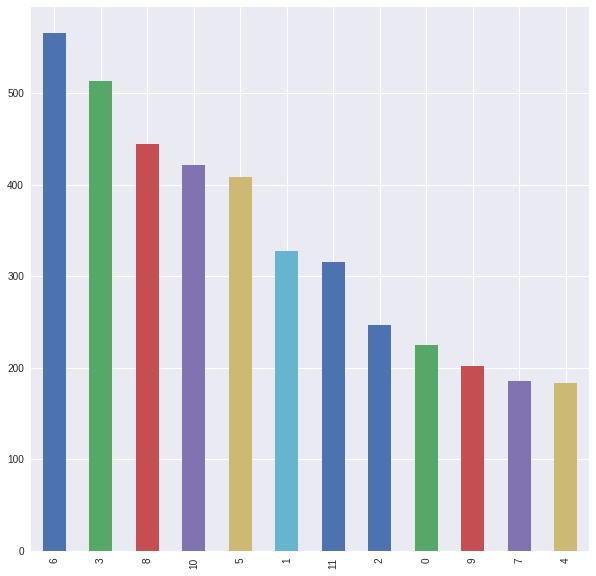

In [39]:
image_size = 224

normalize_img = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])


train_trans = transforms.Compose([
    transforms.RandomSizedCrop(image_size),
#     PowerPIL(),
    transforms.ToTensor(),
#     normalize_img,
#     RandomErasing()
])

## Normalization only for validation and test
valid_trans = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
#     normalize_img
])

batch_size = 8
train_data = df.sample(frac=0.85)
valid_data = df[~df['file'].isin(train_data['file'])]

train_set = GenericDataset(train_data, data_dir, transform = train_trans)
valid_set = GenericDataset(valid_data, data_dir, transform = valid_trans)
        

t_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
v_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True, num_workers=0)
# test_loader  = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=sys.cpu_count -1)

dataset_sizes = {
    'train': len(t_loader.dataset), 
    'valid': len(v_loader.dataset)
}


print (dataset_sizes)
print (train_data["category_id"].value_counts())

train_data['category_id'].value_counts().plot(kind='bar')


## Test the data loader

i=0: 
i=1: 
i=2: 
i=3: 


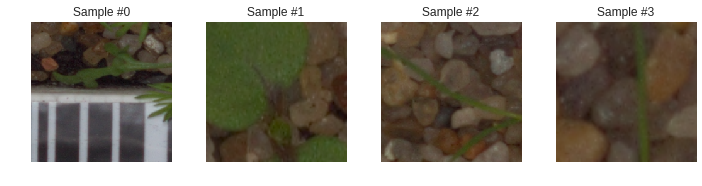

In [40]:
imagesToShow=4

def flaotTensorToImage(img, mean=0, std=1):
        """convert a tensor to an image"""
        img = np.transpose(img.numpy(), (1, 2, 0))
        img = (img*std+ mean)*255
        img = img.astype(np.uint8)    
        return img    

if __name__ == '__main__':  
    for i, data in enumerate(t_loader, 0):
        print('i=%d: '%(i))            
        images, labels = data            
        num = len(images)

        ax = plt.subplot(1, imagesToShow, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{}'.format(i))
        ax.axis('off')

        for n in range(num):
            image=images[n]
            label=labels[n]
            plt.imshow (flaotTensorToImage(image))

        if i==imagesToShow-1:
            break

## Custom Data Augmentation
- https://github.com/zhunzhong07/Random-Erasing

In [0]:
class RandomErasing(object):
    def __init__(self, EPSILON = 0.5, sl = 0.02, sh = 0.4, r1 = 0.3, mean=[0.4914, 0.4822, 0.4465]):
        self.EPSILON = EPSILON
        self.mean = mean
        self.sl = sl
        self.sh = sh
        self.r1 = r1
       
    def __call__(self, img):

        #if random.uniform(0, 1) > self.EPSILON:
        #    return img

        for attempt in range(100):
          area = img.size()[1] * img.size()[2]

          target_area = random.uniform(self.sl, self.sh) * area
          aspect_ratio = random.uniform(self.r1, 1/self.r1)

          height,width = img.size()[1],img.size()[2]
          r = random.randint(20,50)
          a = random.randint(r+10, height - r - 10)
          b = random.randint(r+10, width - r - 10)
          EPSILON = r

          for y in range(height):
            for x in range(width):
              if abs((x-a)**2 + (y-b)**2 - r**2) < EPSILON**2:
                if img.size()[0] == 3:
                    img[0, x, y] = self.mean[0]
                    img[1, x, y] = self.mean[1]
                    img[2, x, y] = self.mean[2]
                else:
                    img[0, x, y] = self.mean[1]
          return img
        return img

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:563: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  "please use transforms.RandomResizedCrop instead.")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


{'train': 4038, 'valid': 712}
6     562
3     509
8     440
10    428
5     407
1     329
11    320
2     243
0     228
9     197
4     189
7     186
Name: category_id, dtype: int64
i=0: 
i=1: 
i=2: 
i=3: 


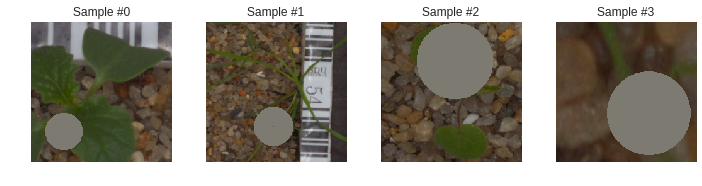

In [136]:
image_size = 224

normalize_img = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])


train_trans = transforms.Compose([
    transforms.RandomSizedCrop(image_size),
#     PowerPIL(),
    transforms.ToTensor(),
#     normalize_img,
    RandomErasing()
])

## Normalization only for validation and test
valid_trans = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
#     normalize_img
])

batch_size = 8
train_data = df.sample(frac=0.85)
valid_data = df[~df['file'].isin(train_data['file'])]

train_set = GenericDataset(train_data, data_dir, transform = train_trans)
valid_set = GenericDataset(valid_data, data_dir, transform = valid_trans)
        

t_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
v_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True, num_workers=0)
# test_loader  = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=4)

dataset_sizes = {
    'train': len(t_loader.dataset), 
    'valid': len(v_loader.dataset)
}


print (dataset_sizes)
print (train_data["category_id"].value_counts())


imagesToShow=4

def flaotTensorToImage(img, mean=0, std=1):
        """convert a tensor to an image"""
        img = np.transpose(img.numpy(), (1, 2, 0))
        img = (img*std+ mean)*255
        img = img.astype(np.uint8)    
        return img    

if __name__ == '__main__':  
    for i, data in enumerate(t_loader, 0):
        print('i=%d: '%(i))            
        images, labels = data            
        num = len(images)

        ax = plt.subplot(1, imagesToShow, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{}'.format(i))
        ax.axis('off')

        for n in range(num):
            image=images[n]
            label=labels[n]
            plt.imshow (flaotTensorToImage(image))

        if i==imagesToShow-1:
            break